# PROJECT: Investigate a Dataset - [The Movie Database_movies]


## Introduction

### Dataset Description

This is the first project from the Data Analyst Nanodegree from Udacity. In this project I analyzed The Movie Database(TMDb) movies and communicated my findings using pandas, numpy and Matplotlib. This data set contains information about 10,000 movies including their user ratings and revenue. This dataset was acquired from TMDb.
This dataset has 10866 labels and 21 features and can be found [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf).

The column tables include id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue_adj.

The last two columns(budget_adj and revenue_adj) show the budget and revenue of each movie adjusted to 2010 dollars to account for inflation. This is significant as it levels the field since the release_date varies from 1960 to 2015. 

### Questions for Analysis

Q1. What kind of properties are associated with movies that have high revenue?

Q2. What genres are more popular from year to year?

Q3. Does increasing a movies's budget result in higher revenue?

Q3. Did longer movies increase the movie's revenue?

In [1]:
#import libraries and read the downloaded csv as a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import csv and read to DataFrame as df
df = pd.read_csv("tmdb-movies.csv")


## Data Wrangling

In this process we will explore our data and check for cleanliness to inform the Data Cleaning process.
We will look at the shape, columns, descriptive statistics and info of our dataset. 
We will also view the first 5 columns using the head function.

First we check for null values in our dataset by calling isnull on the Dataframe. 

Based on our questions above, we will drop the three columns with the highest null values as these will not be used to analyse our data. Drop columns homepage, tagline, keywords.
We will also check for duplicates and remove them.



In [2]:
#Check out the columns in df
df.shape
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [3]:
#Explore descriptive statistics to get the range of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#View the first 3 labels of our dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
'''Investigate the missing values and drop columns that contain lots of missing values.
The following columns have missing labels; imdb_id - 10, homepage- 7930, director - 44, 
tagline - 2824, keywords - 1493, production_companies - 1030.
Drop the columns with the highest values that are not relevant to our research questions- homepage,tagline,director'''

df.drop(["homepage","tagline","director"], axis = 1, inplace = True)
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#Drop all null values found in the remaining features
df.dropna(inplace = True)

In [7]:
#Confirm that the dataset does not contain any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8674 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8674 non-null   int64  
 1   imdb_id               8674 non-null   object 
 2   popularity            8674 non-null   float64
 3   budget                8674 non-null   int64  
 4   revenue               8674 non-null   int64  
 5   original_title        8674 non-null   object 
 6   cast                  8674 non-null   object 
 7   keywords              8674 non-null   object 
 8   overview              8674 non-null   object 
 9   runtime               8674 non-null   int64  
 10  genres                8674 non-null   object 
 11  production_companies  8674 non-null   object 
 12  release_date          8674 non-null   object 
 13  vote_count            8674 non-null   int64  
 14  vote_average          8674 non-null   float64
 15  release_year        

In [8]:
#Check duplicate values and remove them. There was one duplicated row
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [9]:
#Investigate if there are null values in the resulting dataset. This evaluates to false showing there are none
df.isnull().sum().any()

False

In [10]:
#Split the genres column and keep only the first genre description. Assign it to a new column then drop the old one. 

new = df["genres"].str.split("|", n = 1, expand = True)
df["new_genres"] = new[0]
df.drop(columns = ["genres"], inplace = True)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [11]:
#Check the shape and info of the new dataframe
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8673 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8673 non-null   int64  
 1   imdb_id               8673 non-null   object 
 2   popularity            8673 non-null   float64
 3   budget                8673 non-null   int64  
 4   revenue               8673 non-null   int64  
 5   original_title        8673 non-null   object 
 6   cast                  8673 non-null   object 
 7   keywords              8673 non-null   object 
 8   overview              8673 non-null   object 
 9   runtime               8673 non-null   int64  
 10  production_companies  8673 non-null   object 
 11  release_date          8673 non-null   object 
 12  vote_count            8673 non-null   int64  
 13  vote_average          8673 non-null   float64
 14  release_year          8673 non-null   int64  
 15  budget_adj          

Now the data is cleaner with 8673 rows and 18 columns having dropped the three columns and removed null values


## Exploratory Data Analysis

In this section, I will use matplotlib visualizations to explore the dataset and relationships between the features. 
The features I am interested in are genres, budget, popularity. I will compare this against the revenue.
For budget and revenue, I will use the adjusted for inflation columns.

I will use scatter plots for correlation.

### Q1. What kind of properties are associated with movies that have high revenue?

To explore this, I will use a scatter matrix from pandas.

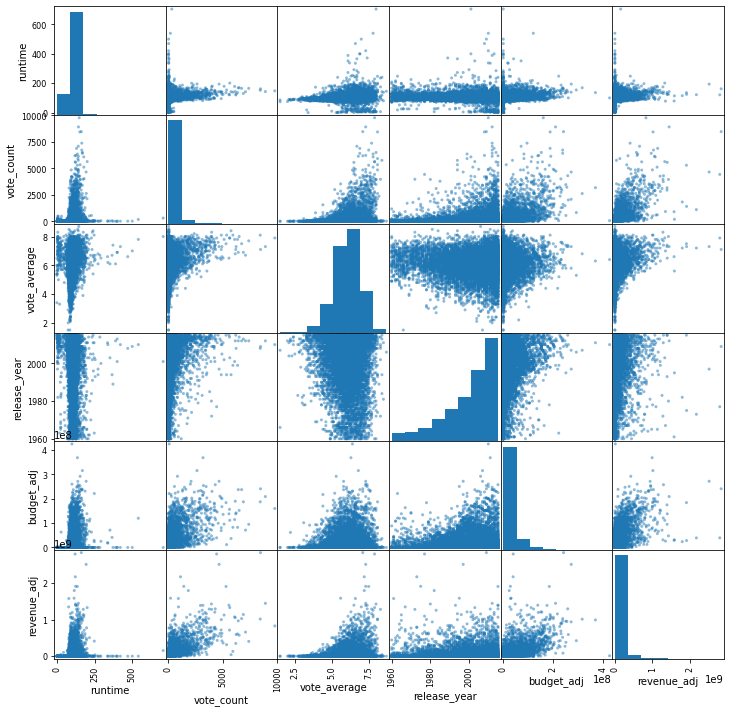

In [12]:
pd.plotting.scatter_matrix(df.iloc[:, 9:17], figsize = (12,12), hist_kwds={'bins':8});

### Q2. What movie genres are more popular?

I will analyse this by plotting a bar graph with new_genres on the y-axis and popularity on the x-axis.

A horizontal bar graph is prefferred as it will ease readability of the genres' names.

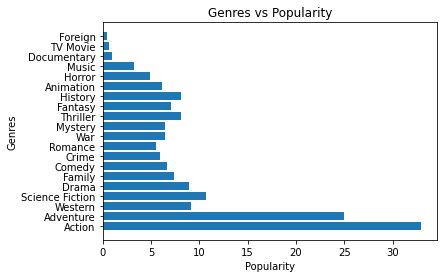

In [13]:
plt.barh(df["new_genres"], df["popularity"])
plt.xlabel("Popularity")
plt.ylabel("Genres")
plt.title("Genres vs Popularity");

### Q3.Does increasing a movies's budget result in higher revenue?

I will analyse the correlation between budget and revenue using a scatter plot. 

For this, I will use a function which I have named scat.

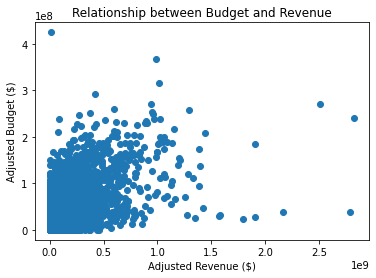

In [14]:
#Define a function to be used repetitively to draw a scatter plot
def scat(x,y, xlabel, ylabel, title):
    ax = plt.subplot(1, 1, 1)
    ax.scatter(x, y),
    ax.set_xlabel(xlabel),
    ax.set_ylabel(ylabel),
    ax.set_title(title)
    plt.show()
    

#Call scat and pass arguments to show the relationship between budget and revenue
scat(df["revenue_adj"], df["budget_adj"]
     ,"Adjusted Revenue ($)"
     ,"Adjusted Budget ($)"
     ,"Relationship between Budget and Revenue"
    );

### Q4. Do longer movies(runtime) bring in more revenue?

I will plot a scatter for the runtime against adjusted revenue using the defined fuction 'scat'.

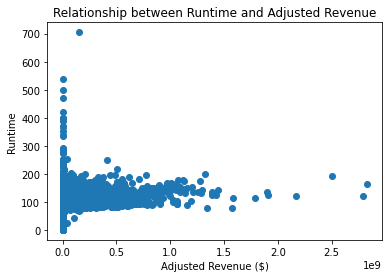

In [15]:
scat(df["revenue_adj"], df["runtime"]
     ,"Adjusted Revenue ($)"
     ,"Runtime"
     ,"Relationship between Runtime and Adjusted Revenue"
    );

## Conclusions

### Conclusions to the Research Questions from the Visualizations

The scatter matrix gives an overview of how the numerical features affect one another.
From the plot, the number of movies released per year has increased, budget and revenue seem to have decreased.

From the analysis, action and adventure genres of movies are more popular.
Foreign movies seem to be the least popular. 
A useful metric to understand this would be what language these foreign movies are getting released in and if translations are available.

There seems to be a positive relationship between the budget and revenue.
From the scatter plot, movies with higher budgets garnered more revenue.
A useful metric to explore this further would be to remove outliers.

The relationship between the runtime and revenue needs to be investigated further.
For movies within the mean runtime(102), increase in the runtime increased the revenue.
The movies with 0 and 900 runtime minutes need to be dealt with to explore this relationship further.

### Limitations 
The major limitation of this project is the quality of the data. Specifically the outliers.
The lower and upper quantiles of these features need to be investigated and dealt with.
However, this might lead to missing of some important statistics. 
For instance, how much revenue did movies with zero budget get.

## References
Splitting Strings into columns. https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

Creating Horizontal Bar Charts. https://datatofish.com/horizontal-bar-chart-matplotlib/

Scatterplot visualizations. https://pythontic.com/visualization/charts/scatterplot
